<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

(-3, 3)

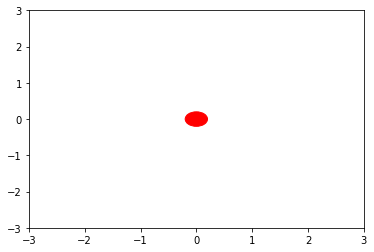

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Doesn't pass VLT (not a function)

circle = plt.Circle((0,0), 0.2, color ='r')

fig, ax = plt.subplots()

ax.add_artist(circle)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

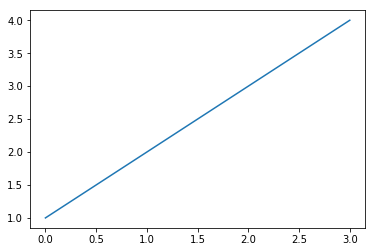

In [4]:
# Passes VLT (function)
plt.plot([1,2,3,4])

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

They produce multiple outputs for the same input.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only relation 2 is a function; the others map multiple outputs to the same input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The dimension of the domain of m is three; the codomain has dimension 4.

The dimension of the domain of n is 4, but the dimension of the codomain is 2.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, it is possible. We could use, for example, the inclusion map that maps all of the lower dimension to themselves and appends the higher dimensions as 0s; for example, $i([3,2,1]) = [3,2,1,0,0,0]$. 

We could also use a null map that maps all elements to the zero vector.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{bmatrix}
    1 & 3 \\
    -1 & 2
    \end{bmatrix}
 
 
 \begin{bmatrix}
    4 & 2 & 2 \\
    -1 & 2 & 3 \\
    5 & 1 & -2 \\
    \end{bmatrix}
 

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors provide a consistent way to describe the action of a linear transformation; stretch this much (the eigenvalues) along these (eigen)vectors.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Computing the result of high dimensional operations can be extremely difficult and time-consuming, and as such is vulnerable to errors.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [15]:
iris_url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
iris = pd.read_csv(iris_url,
                   names=['sepal length','sepal width','petal length','petal width','target'],
                  skiprows = 1)

iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [0]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length','sepal width','petal length','petal width']

x = iris.loc[:, features].values

y = iris.loc[:, 'target'].values

x = StandardScaler().fit_transform(x)

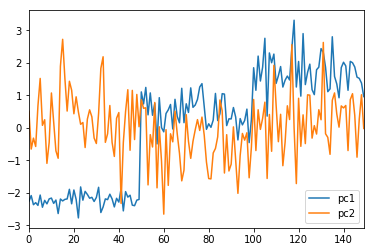

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalComp = pd.DataFrame(data = principalComponents,
                            columns = ['pc1', 'pc2'])
principalComp.plot()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)